In [1]:
using Plots,LaTeXStrings
default(markersize=3,linewidth=1.5)
using DataFrames
using DifferentialEquations

using LinearAlgebra    # Needed for norm to work

# One first use load package
#using Pkg
#Pkg.add("PrettyTables")

using PrettyTables

# Example 6.1.2

The equation $u'=\sin[(u+t)^2]$ also has a solution that can be found numerically with ease, even though no formula exists for its solution. 

In [2]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

The `DifferentialEquations` package offers solvers for a huge variety of problems, including ordinary IVPs. Its syntax is more general (and powerful) than the one we will use to develop some simple solvers of our own. 

In [3]:
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
sol = solve(ivp);

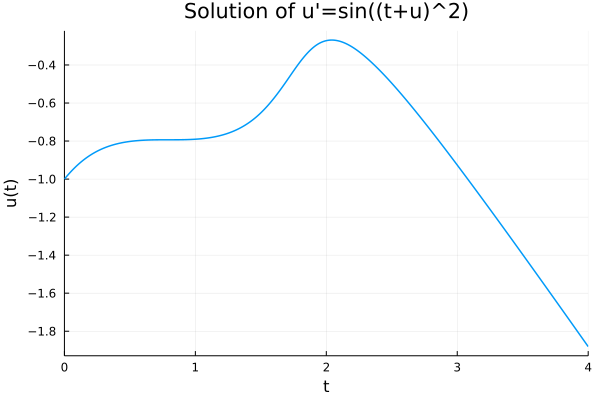

In [4]:
plot(sol,label="",ylabel="u(t)",title="Solution of u'=sin((t+u)^2)")

# Example 6.1.3

We return to the equation $u'=\sin[(u+t)^2]$ to inspect the output a bit more closely. The solution returned by `DifferntialEquations` acts like any callable function that can be evaluated at different values of $t$, or plotted.

In [5]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
sol = solve(ivp);

sol(1.0) = -0.7903205813677855
sol.(0:0.25:4) = [-1.0, -0.8533631069126254, -0.8020190841215507, -0.7933376865576897, -0.7903205813677855, -0.7587997812843065, -0.651547992445796, -0.430971843564476, -0.2720391177664565, -0.3302678020028468, -0.4959233344340219, -0.7021153942909498, -0.9261837644417498, -1.1589646528204514, -1.3967861172298148, -1.6377791453070136, -1.8808597070065494]


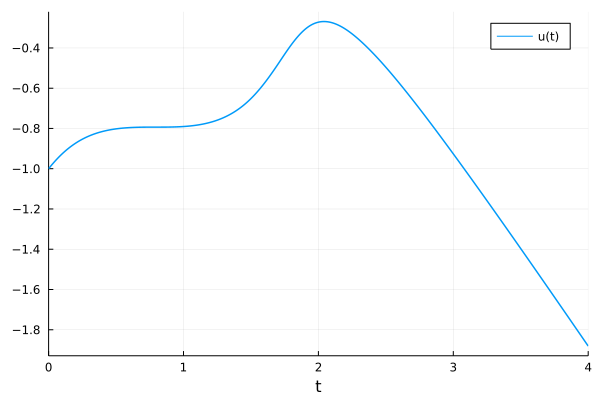

In [6]:
@show sol(1.0);
@show sol.(0:.25:4);
plot(sol,label="u(t)")

The object holds some information about how the values and plot are produced:

In [7]:
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 15-element Vector{Float64}:
 0.0
 0.08678069499623003
 0.2410351946142484
 0.4646650788176079
 0.696832305329891
 1.008615260952658
 1.3746101927769785
 1.7040679903683842
 1.9357170386476548
 2.17184199950257
 2.484296573805691
 2.694248777575363
 3.270491214706377
 3.6253366377105265
 4.0
u: 15-element Vector{Float64}:
 -1.0
 -0.9348300565111116
 -0.8566169597535431
 -0.8056683916104337
 -0.7936141686288142
 -0.7899253266139815
 -0.7186013728573822
 -0.47683704354392314
 -0.2903295316103849
 -0.29499384730634265
 -0.4839483082214715
 -0.6541212036560744
 -1.1782981859762593
 -1.517292344962197
 -1.880859707006551

As you can guess from the output above, the object performs some interpolation on some discrete solution values (in this case, 15 of them). This chapter is about how the discrete $t$ and $u$ values are computed. For now, just note how we can extract them from the solution object.

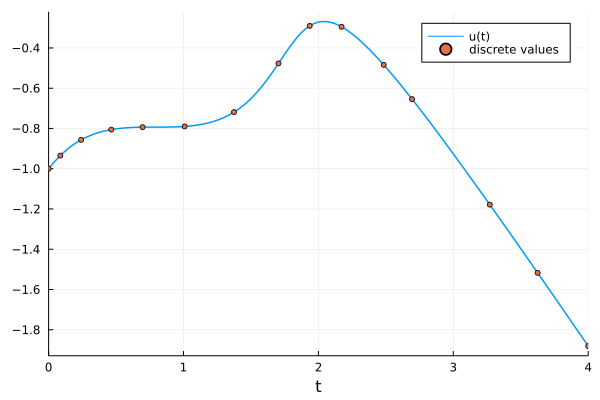

In [8]:
scatter!(sol.t,sol.u,label="discrete values")

# Example 6.1.5

The equation $u'=(u+t)^2$ gives us some trouble.

In [9]:
f = (u,t) -> (t+u)^2

using DifferentialEquations
sol = solve( ODEProblem((u,p,t)->f(u,t),1.,(0.,1.)) );

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/hermanr/.julia/packages/SciMLBase/mndcy/src/integrator_interface.jl:345


The warning message we received can mean that there is a bug in the formulation of the problem. But if everything has been done correctly, it suggests that the solution may not exist past the indicated time. This is always a possibility in nonlinear ODEs. 

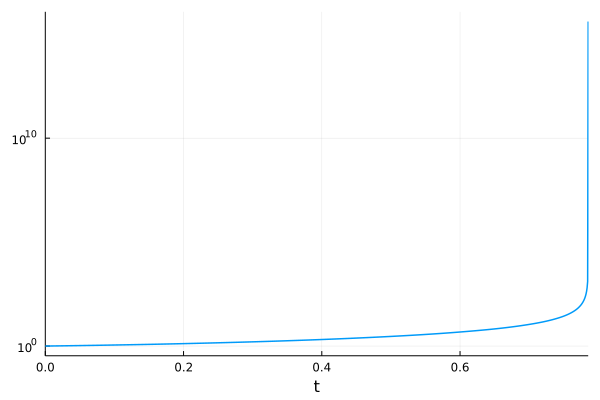

In [10]:
using Plots
plot(sol,label="",yscale=:log10)

# Example 6.1.6

Consider the ODEs $u'=u$ and $u'=-u$. In each case we compute $\partial f/\partial u = \pm 1$, so the condition number bound is $e^{(b-a)}$ in both problems. However, they behave quite differently. In the case of exponential growth, $u'=u$, the bound is the actual condition number.

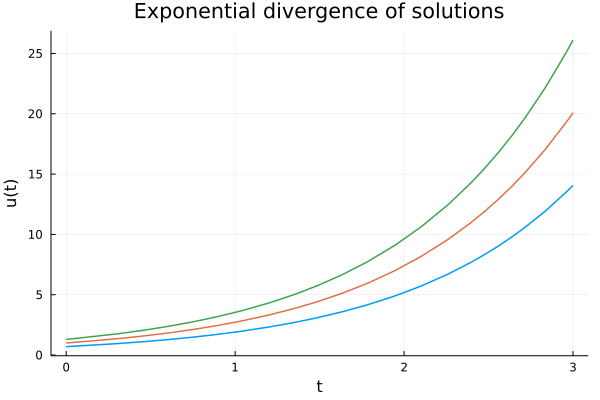

In [11]:
u = [ t->exp(t)*u0 for u0 in [0.7,1,1.3] ]
plot(u,0,3,leg=:none,xlabel="t",ylabel="u(t)", title="Exponential divergence of solutions")

But with $u'=-u$, solutions actually get closer together with time.

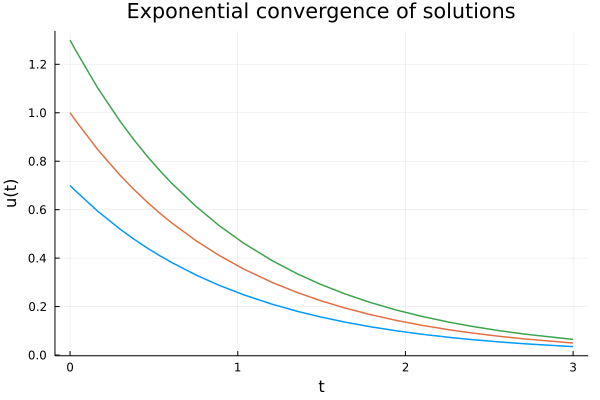

In [12]:
u = [ t->exp(-t)*u0 for u0 in [0.7,1,1.3] ]
plot(u,0,3,leg=:none,xlabel="t",ylabel="u(t)", title="Exponential convergence of solutions")

In this case the actual condition number is one, due to the difference of solutions at the initial time. 

# Example 6.2.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [13]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

In [14]:
"""
    euler(ivp,n)
Apply Euler's method to solve the given IVP using `n` time steps.
Returns a vector of times and a vector of solution values.
"""
function euler(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Initial condition and output setup.
    u = fill(float(ivp.u0),n+1)

    # The time stepping iteration.
    for i in 1:n
        u[i+1] = u[i] + h*ivp.f(u[i],ivp.p,t[i])
    end
    return t,u
end

euler

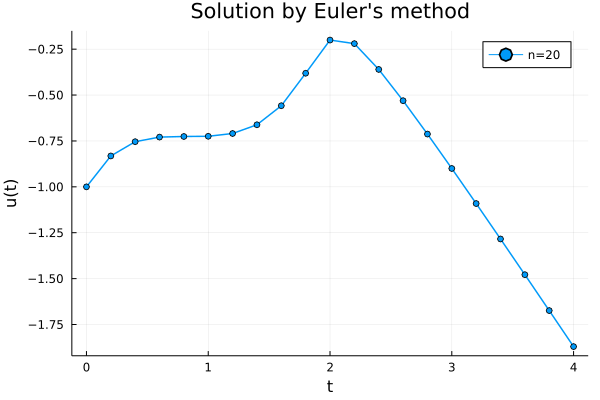

In [15]:
f = (u,p,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

ivp = ODEProblem(f,u0,tspan)


t,u = euler(ivp,20)

plot(t,u,m=:o,label="n=20",
    xlabel="t", ylabel="u(t)", title="Solution by Euler's method" )

We could define a different interpolant to get a smoother picture above, but the derivation assumed the piecewise linear interpolant, so it is the most meaningful one. We can instead request more steps to make the interpolant look smoother.

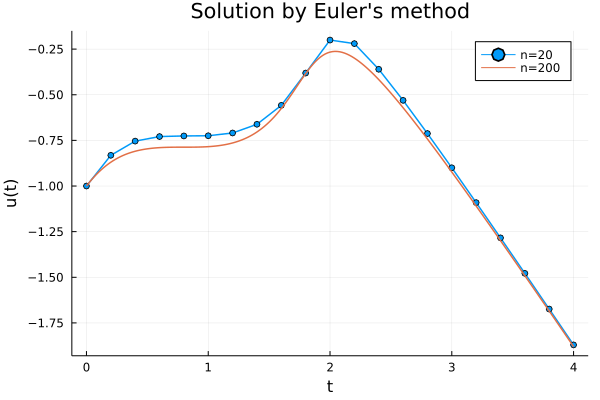

In [16]:
t,u = euler(ivp,200)
plot!(t,u,label="n=200")

Increasing $n$ changed the solution noticeably. Since we know that interpolants and finite differences become more accurate as $h\to 0$, we should expect that from Euler's method too.

We don't have an exact solution to compare to, so we will use a `DifferentialEquations` solver to construct an accurate solution. 

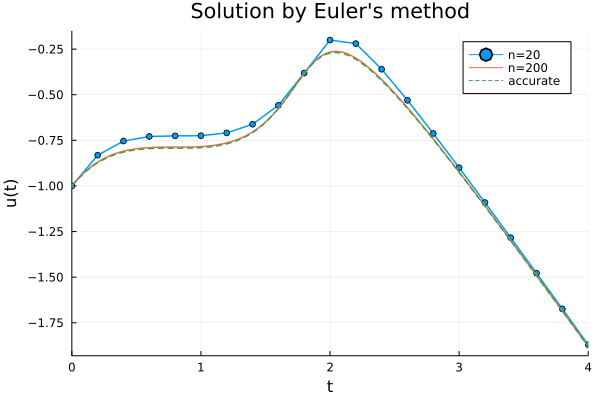

In [17]:
u_exact = solve(ivp,Tsit5(),reltol=1e-14,abstol=1e-14)

plot!(u_exact,l=:dash,label="accurate")

Now we can perform a convergence study. 

In [18]:
n = @. 50*2^(0:5)
err = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = euler(ivp,n)
    err[j] = norm(u_exact.(t)-u,Inf)    
end

pretty_table((n=n,err=err),["n","max-norm error"],backend=:html)

<!DOCTYPE html>
 
 

 
 
 
 
 n 
 max-norm error 
 
 
 
 
 50 
 0.0299962 
 
 
 100 
 0.0142292 
 
 
 200 
 0.00694433 
 
 
 400 
 0.00342947 
 
 
 800 
 0.0017041 
 
 
 1600 
 0.000849416

The error is almost perfectly halved at each step, so we expect that a log-log plot will reveal first-order convergence.

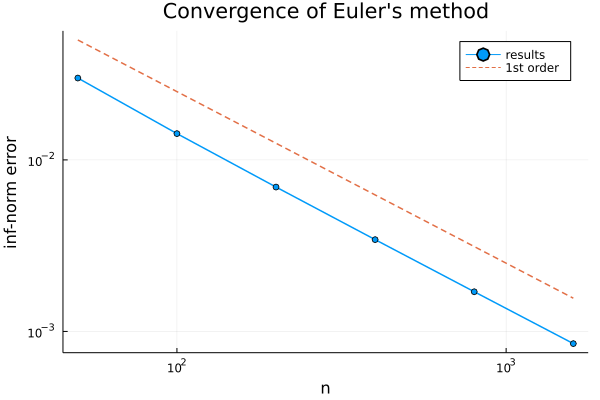

In [19]:
plot(n,err,m=:o,label="results", 
    xaxis=(:log10,"n"), yaxis=(:log10,"inf-norm error"), title="Convergence of Euler's method")

plot!(n,0.05*(n/n[1]).^(-1),l=:dash,label="1st order")

# Example 6.3.2

In [20]:
A = [ -2 5; -1 0 ]

2×2 Matrix{Int64}:
 -2  5
 -1  0

In [21]:
u0 = [1,0]
t = LinRange(0,6,600)     # times for plotting
u = zeros(length(t),length(u0))
for j=1:length(t)
    ut = exp(t[j]*A)*u0 
    u[j,:] = ut'
end

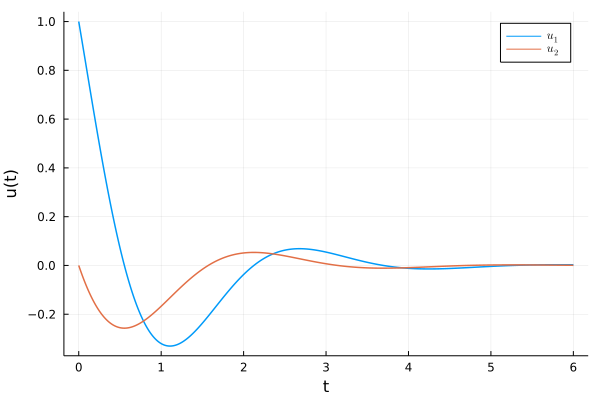

In [22]:
plot(t,u,label=[L"u_1" L"u_2"],xlabel="t",ylabel="u(t)")

# Example 6.3.3

We encode the predator–prey equations via a function. 

In [23]:
function predprey(u,p,t)
    alpha,beta = p;  y,z = u;  # rename for convenience
    s = (y*z) / (1+beta*y)     # appears in both equations
    return [ y*(1-alpha*y) - s,  -z + s ]
end

predprey (generic function with 1 method)

Note that the function accepts three inputs, `u`, `p`, and `t`, even though there is no explicit dependence on `t`. The second input is used to pass parameters that don't change throughout a single instance of the problem. 

To solve the IVP we must also provide the initial condition, which is a 2-vector here, and the interval for the independent variable.

In [24]:
u0 = [1,0.01]
tspan = (0.,80.)
alpha = 0.1;  beta = 0.25;
sol = solve( ODEProblem(predprey,u0,tspan,[alpha,beta]) );

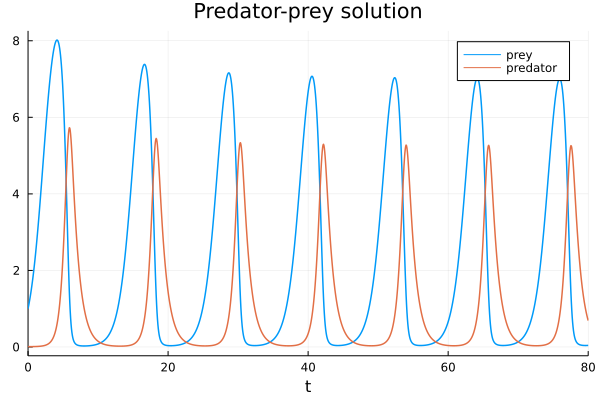

In [25]:
plot(sol,label=["prey" "predator"],title="Predator-prey solution")

We can find the discrete values used to compute the interpolated solution. The `sol.u` value is a vector of vectors, which can make manipulating the values a bit tricky. Here we convert the solution values to a matrix with two columns (one for each component).

size(sol.u) = (133,)
(sol.t[20], sol.u[20]) = (8.386699057811008, [0.027739200084073493, 0.6994176605155754])


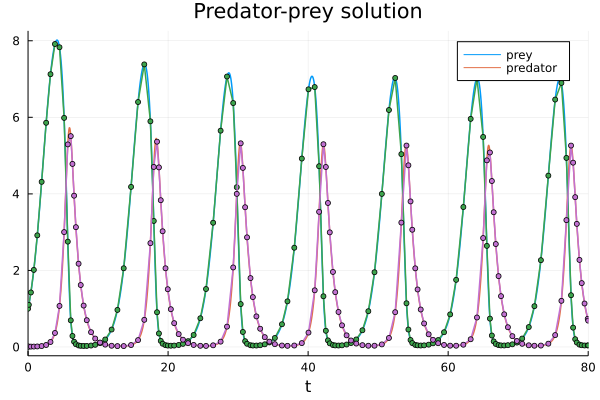

In [26]:
@show size(sol.u);
@show (sol.t[20],sol.u[20]);

u = [ sol.u[i][j] for i=1:length(sol.t), j=1:2 ]
plot!(sol.t,u,m=(:0,3),label="")

When there are just two components, it's common to plot the solution in the _phase plane_, i.e., with $u_1$ and $u_2$ along the axes and time as a parameterization of the curve.

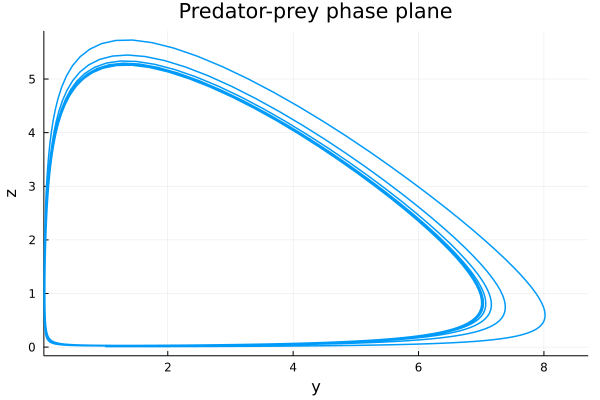

In [27]:
plot(sol,vars=(1,2),label="",
    xlabel="y",ylabel="z",title="Predator-prey phase plane")

From this plot we can deduce that the solution approaches a periodic one, which in the phase plane is reprepresented by a closed loop. 

# Example 6.4.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [28]:
f = (u,p,t) -> sin((t+u)^2)
tspan = (0.0,4.0)
u0 = -1.0

ivp = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

We use a `DifferentialEquations` solver to construct an accurate approximation to the exact solution.

In [29]:
u_exact = solve(ivp,Tsit5(),reltol=1e-14,abstol=1e-14);

Now we perform a convergence study of our two Runge--Kutta implementations.

First add the routines for the Improved Euler method and the Runge-Kutta 4th order method. 

In [30]:
"""
ie2(ivp,n)
Apply the Improved Euler method to solve the given IVP using `n`
time steps. Returns a vector of times and a vector of solution
values.
"""
function ie2(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Initialize output.
    u = fill(float(ivp.u0),n+1)

    # Time stepping.
    for i in 1:n
        uhalf = u[i] + h/2*ivp.f(u[i],ivp.p,t[i]);
        u[i+1] = u[i] + h*ivp.f(uhalf,ivp.p,t[i]+h/2);
    end
    return t,u
end

ie2

In [31]:
"""
rk4(ivp,n)
Apply "the" Runge-Kutta 4th order method to solve the given IVP
using `n` time steps. Returns a vector of times and a vector of
solution values.
"""
function rk4(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Initialize output.
    u = fill(float(ivp.u0),n+1)

    # Time stepping.
    for i in 1:n
        k₁ = h*ivp.f( u[i],      ivp.p, t[i]     )
        k₂ = h*ivp.f( u[i]+k₁/2, ivp.p, t[i]+h/2 )
        k₃ = h*ivp.f( u[i]+k₂/2, ivp.p, t[i]+h/2 )
        k₄ = h*ivp.f( u[i]+k₃,   ivp.p, t[i]+h   )
        u[i+1] = u[i] + (k₁ + 2(k₂+k₃) + k₄)/6
    end
    return t,u
end

rk4

In [32]:
n = @. 50*2^(0:5)
err_IE2 = zeros(size(n))
err_RK4 = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = ie2(ivp,n)
    err_IE2[j] = maximum( @.abs(u_exact(t)-u) )
    t,u = rk4(ivp,n)
    err_RK4[j] = maximum( @.abs(u_exact(t)-u) )
end

pretty_table((n=n,e2=err_IE2,e4=err_RK4),["n","error in IE2","error in RK4"],backend=:html)

<!DOCTYPE html>
 
 

 
 
 
 
 n 
 error in IE2 
 error in RK4 
 
 
 
 
 50 
 0.00353784 
 2.07232e-5 
 
 
 100 
 0.000891415 
 1.2444e-6 
 
 
 200 
 0.000222419 
 7.60655e-8 
 
 
 400 
 5.55659e-5 
 4.70222e-9 
 
 
 800 
 1.38876e-5 
 2.92183e-10 
 
 
 1600 
 3.47159e-6 
 1.82098e-11

The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

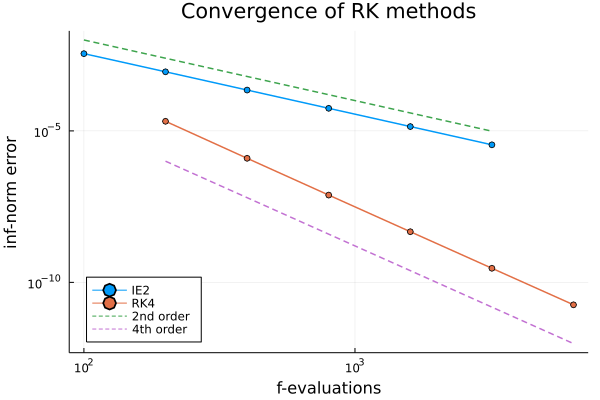

In [33]:
using Plots
plot([2n 4n],[err_IE2 err_RK4],m=:o,label=["IE2" "RK4"],
    xaxis=(:log10,"f-evaluations"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of RK methods",leg=:bottomleft)

plot!(2n,0.01*(n/n[1]).^(-2),l=:dash,label="2nd order")
plot!(4n,1e-6*(n/n[1]).^(-4),l=:dash,label="4th order")

The fourth-order variant is more efficient in this problem over a wide range of accuracy.

# Example 6.5.1

Let's run adaptive RK on  $u'=e^{t-u\sin u}$. 

In [34]:
"""
rk23(ivp,tol)
Apply an adaptive embedded RK formula pair to solve given IVP with
estimated error `tol`. Returns a vector of times and a vector of
solution values.
"""
function rk23(ivp,tol)
    # Initialize for the first time step.
    a,b = ivp.tspan
    t = [a]
    u = [float(ivp.u0)];   i = 1;
    h = 0.5*tol^(1/3)
    s₁ = ivp.f(ivp.u0,ivp.p,a)

    # Time stepping.
    while t[i] < b
        # Detect underflow of the step size.
        if t[i]+h == t[i]
            @warn "Stepsize too small near t=$(t[i])"
            break  # quit time stepping loop
        end

        # New RK stages.
        s₂ = ivp.f( u[i]+(h/2)*s₁,   ivp.p, t[i]+h/2   )
        s₃ = ivp.f( u[i]+(3h/4)*s₂, ivp.p, t[i]+3h/4 )
        unew2 = u[i] + h*(2s₁  + 3s₂ + 4s₃)/9   # 2rd order solution
        s₄ = ivp.f( unew2, ivp.p, t[i]+h )
        err = h*(-5s₁/72 + s₂/12 + s₃/9 - s₄/8)  # 2nd/3rd difference
        E = norm(err,Inf)                         # error estimate
        maxerr = tol*(1 + norm(u[i],Inf))     # relative/absolute blend

        # Accept the proposed step?
        if E < maxerr     # yes
            push!(t,t[i]+h)
            push!(u,unew2)
            i += 1
            s₁ = s₄       # use FSAL property
        end

        # Adjust step size.
        q = 0.8*(maxerr/E)^(1/3)   # conservative optimal step factor
        q = min(q,4)               # limit stepsize growth
        h = min(q*h,b-t[i])        # don't step past the end
    end
    return t,u
end

rk23

In [35]:
f = (u,p,t) -> exp(t-u*sin(u))
ivp = ODEProblem(f,0,(0.,5.))

ODEProblem with uType Int64 and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: 0

The solution makes a very abrupt change near $t=2.4$. The resulting time steps vary over three orders of magnitude.

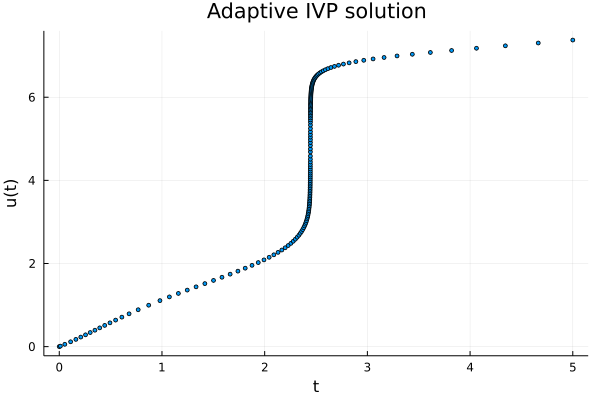

In [36]:
t,u = rk23(ivp,1e-5)

scatter(t,u,m=(:o,2),label="",
    xlabel="t",ylabel="u(t)",title="Adaptive IVP solution")

If we had to run with a uniform step size to get this accuracy, it would be

In [37]:
h_min = minimum(diff(t))

4.6096854609878335e-5

On the other hand, the average step size that was actually taken was

In [38]:
h_avg = sum(diff(t))/(length(t)-1)

0.03205128205128205

We took fewer steps by a factor of almost 1000! Even accounting for the extra stage per step and the occasional rejected step, the savings are clear.

# Example 6.5.2

In [39]:
f = (u,p,t) -> (t+u)^2
ivp = ODEProblem(f,1,(0.,1.))

t,u = rk23(ivp,1e-5);

┌ Warning: Stepsize too small near t=0.7854087204072808
└ @ Main In[34]:19


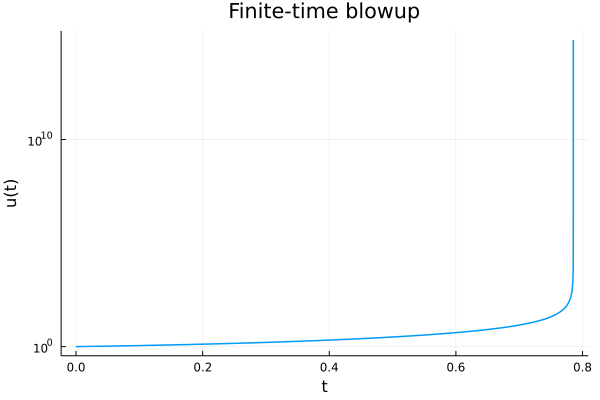

In [40]:
plot(t,u,label="",
    xlabel="t",yaxis=(:log10,"u(t)"),title="Finite-time blowup")

# Example 6.7.1

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [41]:
ivp = ODEProblem((u,p,t)->sin((t+u)^2),-1.,(0.0,4.0))

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

We use a solver from `DifferentialEquations` to construct an accurate approximation to the exact solution.

In [42]:
u_exact = solve(ivp,Tsit5(),reltol=1e-14,abstol=1e-14);

Now we perform a convergence study of the AB4 code. 

In [43]:
"""
ab4(ivp,n)
Apply the Adams-Bashforth 4th order method to solve the given IVP
using `n` time steps.
"""
function ab4(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

    # Constants in the AB4 method.
    k = 4;    σ = [55, -59, 37, -9]/24;

    # Find starting values by RK4.
    u = fill(float(ivp.u0),n+1)
    rkivp = ODEProblem(ivp.f,ivp.u0,(a,a+(k-1)*h),ivp.p)
    ts,us = rk4(rkivp,k-1)
    u[1:k] = us[1:k]

    # Compute history of u' values, from newest to oldest.
    f = [ ivp.f(u[k-i],ivp.p,t[k-i]) for i in 1:k-1  ]

    # Time stepping.
    for i in k:n
      f = [ ivp.f(u[i],ivp.p,t[i]), f[1:k-1]... ]   # new value of du/dt
      u[i+1] = u[i] + h*sum(f[j]*σ[j] for j in 1:k)  # advance a step
    end
    return t,u
end

ab4

In [44]:
n = @. 10*2^(0:5)
err = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = ab4(ivp,n)
    err[j] = norm(u_exact.(t)-u,Inf)
end

pretty_table((n=n,err=err),["n","inf-norm error"],backend=:html)

<!DOCTYPE html>
 
 

 
 
 
 
 n 
 inf-norm error 
 
 
 
 
 10 
 1.42133 
 
 
 20 
 0.299868 
 
 
 40 
 0.00627809 
 
 
 80 
 0.000539273 
 
 
 160 
 3.97598e-5 
 
 
 320 
 2.64516e-6

The method should converge as $O(h^4)$, so a log-log scale is appropriate for the errors. 

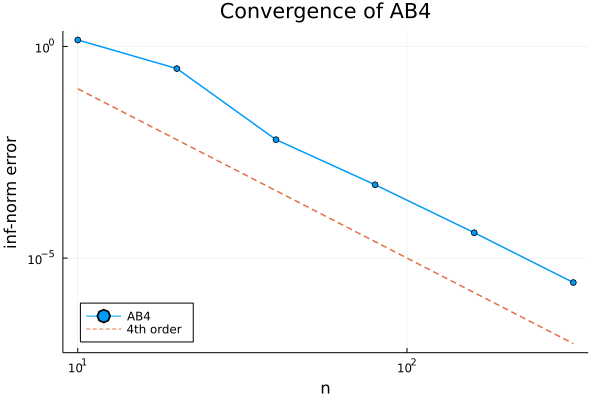

In [45]:
plot(n,err,m=:o,label="AB4",
    xaxis=(:log10,"n"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of AB4",leg=:bottomleft)

plot!(n,0.1*(n/n[1]).^(-4),l=:dash,label="4th order")

# Example 6.7.2

The following simple ODE uncovers a surprise. 

In [46]:
ivp = ODEProblem((u,p,t)->u^2-u^3, 0.005, (0,400.))

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 400.0)
u0: 0.005

We will solve the problem first with the implicit AM2 method using $n=200$ steps.

This Adams-Moulton 2nd order method relies on Levenberg:

In [47]:
"""
levenberg(f,x₁,tol)
Use Levenberg's quasi-Newton iteration to find a root of the system
`f`, starting from `x₁`, with `tol` as the stopping tolerance in
both step size and residual norm. Returns root estimates as a
matrix, one estimate per column.
"""
function levenberg(f,x₁,tol=1e-12)

# Operating parameters.
ftol = tol;  xtol = tol;  maxiter = 40;

x = zeros(length(x₁),maxiter)
x = [float(x₁)]
fₖ = f(x₁)
k = 1;  s = Inf;
Aₖ = fdjac(f,x₁,fₖ)   # start with FD Jacobian
jac_is_new = true

λ = 10;
while (norm(s) > xtol) && (norm(fₖ) > ftol) && (k < maxiter)
    # Compute the proposed step.
    B = Aₖ'*Aₖ + λ*I
    z = Aₖ'*fₖ
    s = -(B\z)

    xnew = x[k] + s
    fnew = f(xnew)

    # Do we accept the result?
    if norm(fnew) < norm(fₖ)    # accept
        y = fnew - fₖ
        push!(x,xnew)
        fₖ = fnew
        k += 1

        λ = λ/10   # get closer to Newton
        # Broyden update of the Jacobian.
        Aₖ = Aₖ + (y-Aₖ*s)*(s'/(s'*s))
        jac_is_new = false
    else                       # don't accept
        # Get closer to steepest descent.
        λ = 4λ
        # Re-initialize the Jacobian if it's out of date.
        if !jac_is_new
            Aₖ = fdjac(f,x[k],fₖ)
            jac_is_new = true
        end
    end
end

if (norm(fₖ) > 1e-3)
    @warn "Iteration did not find a root."
end

return x
end

levenberg

In [48]:
"""
fdjac(f,x0,y0)
Compute a finite-difference approximation of the Jacobian matrix for
`f` at `x0`, where `y0`=`f(x0)` is given.
"""
function fdjac(f,x0,y0)

δ = sqrt(eps())   # FD step size
m,n = length(y0),length(x0)
if n==1
    J = (f(x0+δ) - y0) / δ
else
    J = zeros(m,n)
    Iₙ = I(n)
    for j = 1:n
        J[:,j] = (f(x0 + δ*Iₙ[:,j]) - y0) / δ
    end
end

return J
end

fdjac

In [49]:
"""
am2(ivp,n)
Apply the Adams-Moulton 2nd order method to solve given IVP using
`n` time steps.
"""
function am2(ivp,n)
    # Time discretization.
    a,b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]

     # Initialize output.
     u = fill(float(ivp.u0),n+1)

    # Time stepping.
    for i in 1:n
        # Data that does not depend on the new value.
        known = u[i] + h/2*ivp.f(u[i],ivp.p,t[i])
        # Find a root for the new value.
        F = z -> z .- h/2*ivp.f(z,ivp.p,t[i+1]) .- known
        unew = levenberg(F,known)
        u[i+1] = unew[end]
    end
    return t,u
end

am2

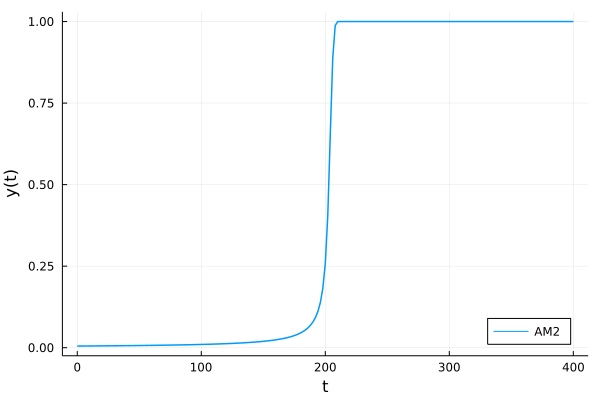

In [50]:
tI,uI = am2(ivp,200)

plot(tI,uI,label="AM2",xlabel="t",ylabel="y(t)",leg=:bottomright)

Now we repeat the process using the explicit AB4 method.

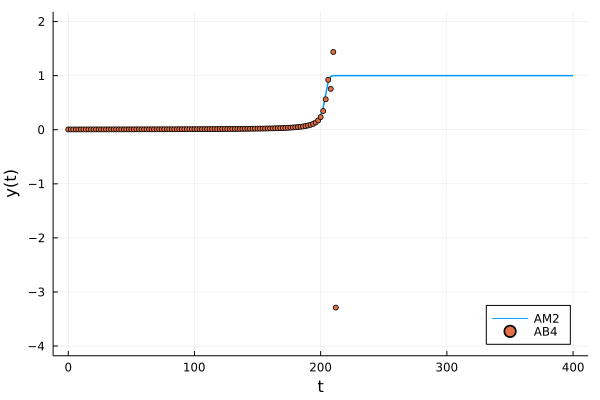

In [51]:
tE,uE = ab4(ivp,200)

scatter!(tE,uE,m=3,label="AB4",ylim=[-4,2])

Once the solution starts to take off, the AB4 result goes catastrophically wrong.

In [52]:
uE[105:111]

7-element Vector{Float64}:
   0.7553857798343923
   1.4372970308402562
  -3.2889768512289934
 214.1791132643978
  -4.482089146771584e7
   4.1268902909420876e23
  -3.221441244795439e71

We hope that AB4 will converge in the limit $h\to 0$, so let's try using more steps.

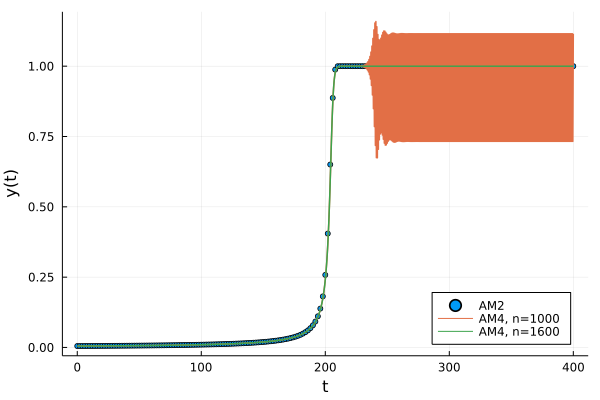

In [53]:
plt = scatter(tI,uI,label="AM2",m=3,xlabel="t",ylabel="y(t)",leg=:bottomright)

for n = [1000,1600]
    tE,uE = ab4(ivp,n);
    plot!(tE,uE,label="AM4, n=$n")
end
display(plt)

So AB4, which is supposed to be _more_ accurate than AM2, actually needs something like 8 times as many steps to get a reasonable-looking answer!

# Example 6.8.1

Consider the ridiculously simple IVP $u'=u$, $u(0)=1$, whose solution is $e^t$. 

In [54]:
dudt = (u,t) -> u;
u_exact = exp;
a = 0.0;  b = 1.0;

Let's apply the LIAF method to this problem for varying fixed step sizes. We'll measure the error at the time $t=1$. 

In [55]:
n = [5,10,20,40,60]
err = zeros(size(n))
t = [];  u = [];
for (j,n) = enumerate(n)
    h = (b-a)/n
    t = [ a + i*h for i=0:n ]
    u = [1; u_exact(h); zeros(n-1)];
    f = [dudt(u[1],t[1]); zeros(n)];
    for i = 2:n
        f[i] = dudt(u[i],t[i])
        u[i+1] = -4*u[i] + 5*u[i-1] + h*(4*f[i]+2*f[i-1])
    end
    err[j] = abs(u_exact(b) - u[end])
end
DataFrame(n=n,h=(b-a)./n,error=err)    

5×3 DataFrame
 Row │ n      h          error      
     │ Int64  Float64    Float64    
─────┼──────────────────────────────
   1 │     5  0.2        0.0160452
   2 │    10  0.1        2.84548
   3 │    20  0.05       1.6225e6
   4 │    40  0.025      9.3442e18
   5 │    60  0.0166667  1.74013e32

The error starts out promisingly, but things explode from there. A graph of the last numerical attempt yields a clue.

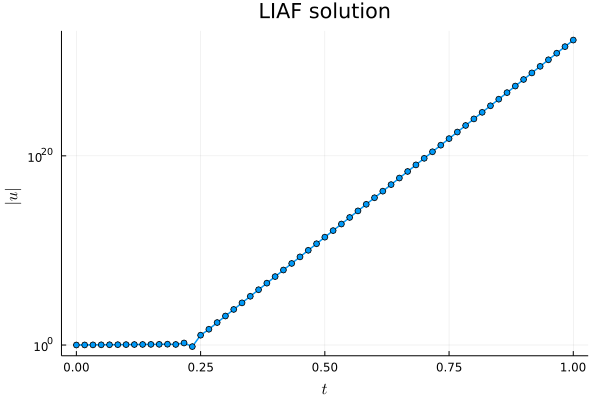

In [56]:
plot(t,abs.(u),m=:o,label="",
    xlabel=L"t",yaxis=(:log10,L"|u|"),title="LIAF solution")

It's clear that the solution is growing exponentially in time.